# IRIS SPECIES CLASSIFICATION USING PYTHON

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/iris. Besides, this is a well-known problem in the Machine Learning Literature , that this dataset is pre-included with R  and Python packages for analysis.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

1. Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species (3 Classes)

The task here is to classify each observation, to either one of the three classes.

The analysis is done in Python

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

We have imported the required libraries for anlaysis and visualization. Now read in the dataset and view it.

In [2]:
iris = pd.read_csv('Iris.csv')

## Data Visualization

In [3]:
iris.info()
iris.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


There are no missing values in the dataset. Further, lets visualize the data, except the 'Id' variable in a pairplot.

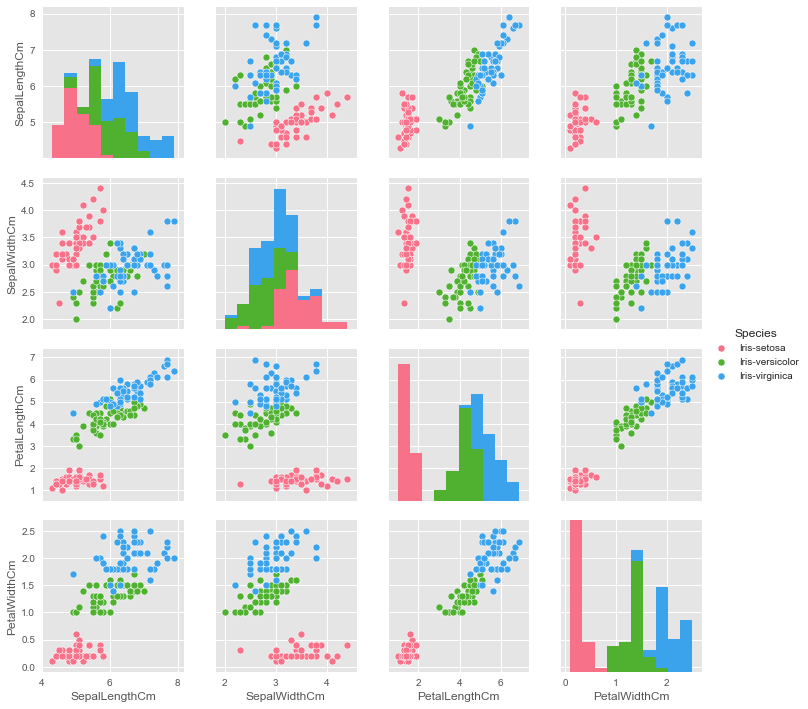

In [5]:
sns.pairplot(iris.iloc[:,[1,2,3,4,5]], hue='Species',palette="husl")

Our first observation is that the dataset is well-structured, with fewer number of outliers. The classes are almost separable, helping us for easy analysis.

To find out what features could be relevant for predictions it will be useful to plot a correlation plot between the variables

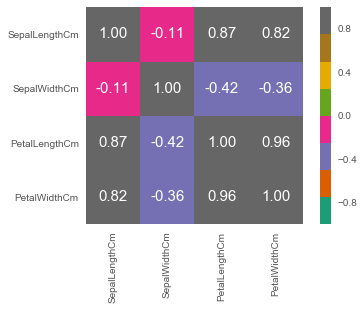

In [6]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
corr_matrix = iris[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

We observe an important fact from the correlation plot. The features PetalLengthCm and PetalWidthCm are strongly correlated where as features SepalLengthCm and SepalWidthCm are not weakly correlated. This gives us a hint htat Petal Parameters could be better predictors !

## Data Preprcessing

In [7]:
X = iris.iloc[:,[1,2,3,4,5]].values
y = iris['Species']

Now create X and y variables for classification. Also we need to encode the categorical feature 'Species'.

In [8]:
# Encoding categorical target feature 'Species'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:,4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

Based on the correlations we have observed in the plots, lets do analysis in two different ways: 
1. using Sepal Parameters
2. using Petal parameters

So first lets include SepalWidthCm and SepalLengthCm features only.

In [9]:
X = iris[['SepalLengthCm','SepalWidthCm']]

In [10]:
#Do the'train_test_split'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Classifier model

Lets try the Logistic Regression and see if it can produce accurate predictions for the data. We first try the Sepal parameters only and then the Petals.

In [11]:
# Fitting a Logistic Regression to the data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn import metrics
print('The accuracy of the Logistic Regression with Sepals is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression with Sepals is 0.666666666667


Observe the accuracy is 66.66 % with only Sepal parameters in action. This is not that a great accuracy for such a dataset.

Now check for prediction accuracy using Petal parameters only.

In [12]:
X = iris[['PetalLengthCm','PetalWidthCm']]

In [13]:
#Do the'train_test_split'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting a Logistic Regression to the data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('The accuracy of the Logistic Regression  with Petals is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression  with Petals is 0.8


Observe the accuracy with Petal parameters onlt is 80 % , a good improvement over the previous one.

We know from earlier literatures that we are supposed to get an accuracy well in the range of 90-100 % for the Iris dataset. So lets make use of two other efficient algorithms here. i.e. Random Forests and SVM's 

In [16]:
# Fitting Random Forest Classification to the Training set
# with Sepals only
X = iris[['SepalLengthCm','SepalWidthCm']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state = 0)
rfclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rfclassifier.predict(X_test)
print('The accuracy of the Random Forests with Sepals is',metrics.accuracy_score(y_pred,y_test))

#with Petals only
X = iris[['PetalLengthCm','PetalWidthCm']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state = 0)
rfclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rfclassifier.predict(X_test)
print('The accuracy of the Random Forests with Petals is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Random Forests with Sepals is 0.688888888889
The accuracy of the Random Forests with Petals is 0.933333333333


In [17]:
# Fitting SVM Classification to the Training set
# with Sepals only
X = iris[['SepalLengthCm','SepalWidthCm']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('The accuracy of the Random Forests with Sepals is',metrics.accuracy_score(y_pred,y_test))

# with Petals only
X = iris[['PetalLengthCm','PetalWidthCm']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('The accuracy of the Random Forests with Petals is',metrics.accuracy_score(y_pred,y_test))


The accuracy of the Random Forests with Sepals is 0.777777777778
The accuracy of the Random Forests with Petals is 0.977777777778


## Concluding Remarks

1. SVM's and Randomf Forests can give out good predictions
2. Using Petals over Sepal for training the data gives a much better accuracy.
3. This was expected as we saw in the correlation plot that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
4. Proper choice of features is very essential for accurate predictions